# Preprocessing Data - Erase Transform Load

## Import module / package

In [1]:
import pandas as pd 
import numpy as np
import string, re, nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
dataclean = pd.read_csv("data/tweets.csv")
dataclean.head(10)

,Datetime,Tweet Id,Tweet,Username
0,2021-10-14 23:06:49+00:00,1448787405549367308,@awesomecemok @Zlhlmi____ JB...harga ayam rm8....,RezanHassan5401
1,2021-10-14 18:11:53+00:00,1448713183842091008,Berdikari serap telur dari peternak untuk stab...,ElshintaDotcom
2,2021-10-14 17:43:33+00:00,1448706053613375504,Penyebab Harga Telur Makin Anjlok Versi Pedaga...,AlbertSolo2
3,2021-10-14 17:38:05+00:00,1448704679001542661,Turunnya permintaan masyarakat akan telur ayam...,AlbertSolo2
4,2021-10-14 17:31:27+00:00,1448703009714675742,"Tapi tidak bagi peternak ayam petelur, mereka ...",AlbertSolo2
5,2021-10-14 17:29:06+00:00,1448702417357316114,Harga jual telur ayam di solo raya semakin anj...,AlbertSolo2
6,2021-10-14 17:22:06+00:00,1448700656433307659,"Harga Telur Anjlok Rp15.000 per Kg, Pemerintah...",AlbertSolo2
7,2021-10-14 16:45:26+00:00,1448691428503154690,@PanenTelur yuk ikutan main telur bareng utk v...,rakhmarini
8,2021-10-14 16:27:19+00:00,1448686868023812100,"telor geprek abah uya. selera semua orang, ras...",yoomalek
9,2021-10-14 16:11:14+00:00,1448682821363453952,@McDMalaysia Baru td beli saya order yang ada ...,biey_evans


In [3]:
dataclean.drop(["Datetime", "Tweet Id", "Username"], axis = 1, inplace = True)
dataclean.columns = dataclean.columns.str.strip().str.lower()
dataclean.head(10)

,tweet
0,@awesomecemok @Zlhlmi____ JB...harga ayam rm8....
1,Berdikari serap telur dari peternak untuk stab...
2,Penyebab Harga Telur Makin Anjlok Versi Pedaga...
3,Turunnya permintaan masyarakat akan telur ayam...
4,"Tapi tidak bagi peternak ayam petelur, mereka ..."
5,Harga jual telur ayam di solo raya semakin anj...
6,"Harga Telur Anjlok Rp15.000 per Kg, Pemerintah..."
7,@PanenTelur yuk ikutan main telur bareng utk v...
8,"telor geprek abah uya. selera semua orang, ras..."
9,@McDMalaysia Baru td beli saya order yang ada ...


## Case Folding
Mengubah huruf kapital (uppercase) menjadi huruf kecil (lowercase) (library pandas)

In [4]:
dataclean['tweet'] = dataclean['tweet'].str.lower()
print('Hasil Case Folding : \n')
print(dataclean['tweet'].head(10))
print('\n\n\n')

Hasil Case Folding : 

0    @awesomecemok @zlhlmi____ jb...harga ayam rm8....
1    berdikari serap telur dari peternak untuk stab...
2    penyebab harga telur makin anjlok versi pedaga...
3    turunnya permintaan masyarakat akan telur ayam...
4    tapi tidak bagi peternak ayam petelur, mereka ...
5    harga jual telur ayam di solo raya semakin anj...
6    harga telur anjlok rp15.000 per kg, pemerintah...
7    @panentelur yuk ikutan main telur bareng utk v...
8    telor geprek abah uya. selera semua orang, ras...
9    @mcdmalaysia baru td beli saya order yang ada ...
Name: tweet, dtype: object






## Cleansing Data
Menghapus seluruh tanda baca, link, hashtag, mention

In [5]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove url (menghapus link)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)(?:(?:\/[^\s/]))*', '', text)
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataclean['tweet'] = dataclean['tweet'].apply(remove_tweet_special)

#remove number (menghapus angka)
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataclean['tweet'] = dataclean['tweet'].apply(remove_number)

#remove punctuation (menghapus tanda baca)
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataclean['tweet'] = dataclean['tweet'].apply(remove_punctuation)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataclean['tweet'] = dataclean['tweet'].apply(remove_singl_char)

dataclean.head()

#remove whitespace leading & trailing (menghapus spasi awal dan akhir)
def remove_whitespace_LT(text):
    return text.strip()

dataclean['tweet'] = dataclean['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataclean['tweet'] = dataclean['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataclean['tweet'] = dataclean['tweet'].apply(remove_singl_char)

dataclean.head(10)

,tweet
0,jbharga ayam rm tgk tempat dan telor wyam sepa...
1,berdikari serap telur dari peternak untuk stab...
2,penyebab harga telur makin anjlok versi pedaga...
3,turunnya permintaan masyarakat akan telur ayam...
4,tapi tidak bagi peternak ayam petelur mereka m...
5,harga jual telur ayam di solo raya semakin anj...
6,harga telur anjlok rp per kg pemerintah dimint...
7,yuk ikutan main telur bareng utk voucher poton...
8,telor geprek abah uya selera semua orang rasa ...
9,baru td beli saya order yang ada telur tapi yg...


In [6]:
# dataclean.to_csv("Tweets_Clean.csv")

In [7]:
#dataset = pd.read_csv("datasenti.csv")
# dataset = pd.read_csv("Tweets_Cabai.csv")
# dataset.head()
dataset = dataclean

## Tokenizing the Data
Membagi kalimat menjadi per kata / bagian-bagian kata

In [8]:
nltk.download('punkt')
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataset['tweet'] = dataset['tweet'].apply(word_tokenize_wrapper)
dataset['tweet']

[nltk_data] Downloading package punkt to /home/asus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [jbharga, ayam, rm, tgk, tempat, dan, telor, w...
1       [berdikari, serap, telur, dari, peternak, untu...
2       [penyebab, harga, telur, makin, anjlok, versi,...
3       [turunnya, permintaan, masyarakat, akan, telur...
4       [tapi, tidak, bagi, peternak, ayam, petelur, m...
                              ...                        
4381    [benda, paling, bodoh, aku, dengar, harini, ma...
4382    [sedangkan, komoditi, yang, mengalami, penurun...
4383    [qiraniayr, harga, telor, turun, harga, minyak...
4384    [nak, tolong, peniaga, melayu, tapi, roti, tel...
4385    [kalau, dari, rep, yg, lain, pada, bilang, sek...
Name: tweet, Length: 4386, dtype: object

## Normalizing the Data
Mengubah kata yg tidak baku/kata yg disingkat menjadi kata baku

In [9]:
#normalizad_word = pd.read_excel("normalisasi.xlsx")
! pip install openpyxl
normalizad_word = pd.read_excel("data/normalisasi.xlsx",engine='openpyxl')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataset['tweet'] = dataset['tweet'].apply(normalized_term)

dataset.head(10)

Defaulting to user installation because normal site-packages is not writeable


,tweet
0,"[jbharga, ayam, rm, tgk, tempat, dan, telor, w..."
1,"[berdiri di atas kaki sendiri, serap, telur, d..."
2,"[penyebab, harga, telur, makin, anjlok, versi,..."
3,"[turunnya, permintaan, masyarakat, akan, telur..."
4,"[tapi, tidak, bagi, peternak, ayam, petelur, m..."
5,"[harga, jual, telur, ayam, di, solo, raya, sem..."
6,"[harga, telur, anjlok, rp, per, kg, pemerintah..."
7,"[yuk, ikutan, main, telur, bareng, untuk, vouc..."
8,"[telor, geprek, abah, uya, selera, semua, oran..."
9,"[baru, tadi, beli, saya, order, yang, ada, tel..."


In [10]:
dataset.to_csv('data/tweets_bf_stpwrd.csv', index=False)

## Stopword Removal
Membuang kata yang tidak memiliki makna atau arti penting

In [11]:
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
txt_stopword = pd.read_csv("data/stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
dataset['tweet'] = dataset['tweet'].apply(stopwords_removal) 
dataset

[nltk_data] Downloading package stopwords to /home/asus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet
0,"[jbharga, ayam, rm, tgk, telor, wyam, sepapan,..."
1,"[berdiri di atas kaki sendiri, serap, telur, p..."
2,"[penyebab, harga, telur, anjlok, versi, pedaga..."
3,"[turunnya, permintaan, masyarakat, telur, ayam..."
4,"[peternak, ayam, petelur, mengaku, merugi, rat..."
...,...
4381,"[benda, bodoh, dengar, harini, beli, lunch, na..."
4382,"[komoditi, mengalami, penurunan, harga, daging..."
4383,"[qiraniayr, harga, telor, turun, harga, minyak..."
4384,"[nak, tolong, peniaga, melayu, roti, telur, ha..."


## Stemming

Menjadikan kata yang memiliki imbuhan menjadi kata dasar

_Menggunakan library Sastrawi (Algoritma Nazief)_

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tqdm.pandas()
dataset['tweet'] = dataset['tweet'].progress_apply(lambda x: [stemmer.stem(y) for y in x])
dataset

  0%|          | 0/4386 [00:00<?, ?it/s]

,tweet
0,"[jbharga, ayam, rm, tgk, telor, wyam, papan, r..."
1,"[diri di atas kaki sendiri, serap, telur, tern..."
2,"[sebab, harga, telur, anjlok, versi, dagang, k..."
3,"[turun, minta, masyarakat, telur, ayam, ppkm, ..."
4,"[ternak, ayam, telur, aku, rugi, ratus, juta, ..."
...,...
4381,"[benda, bodoh, dengar, harini, beli, lunch, na..."
4382,"[komoditi, alami, turun, harga, daging, ayam, ..."
4383,"[qiraniayr, harga, telor, turun, harga, minyak..."
4384,"[nak, tolong, niaga, melayu, roti, telur, harg..."


In [13]:
dataset.to_csv('data/tweets_clean.csv', index=False)
dataclean = pd.read_csv('data/tweets_clean.csv', encoding='latin1')
dataclean.head(10)

,tweet
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya..."
1,"['diri di atas kaki sendiri', 'serap', 'telur'..."
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',..."
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya..."
4,"['ternak', 'ayam', 'telur', 'aku', 'rugi', 'ra..."
5,"['harga', 'jual', 'telur', 'ayam', 'solo', 'ra..."
6,"['harga', 'telur', 'anjlok', 'rp', 'kg', 'peri..."
7,"['ikut', 'main', 'telur', 'bareng', 'voucher',..."
8,"['telor', 'geprek', 'abah', 'uya', 'selera', '..."
9,"['beli', 'order', 'telur', 'set', 'telur', 'mc..."


## Proses TF IDF

In [14]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(dataclean['tweet'].astype('U'))
text_tf

<4386x8518 sparse matrix of type '<class 'numpy.float64'>'
	with 56112 stored elements in Compressed Sparse Row format>

In [15]:
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5
, ngram_range=(1,2))
cvec
#Bobot untuk setiap istilah dalam setiap dokumen
transformer = TfidfVectorizer()
transformed_weights = transformer.fit_transform(dataclean['tweet'].astype("U"))
transformed_weights
#melihat term teratas dengan weight rata-rata tf-idf
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': transformer.get_feature_names(),
'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
2639,harga,0.073310
7644,telur,0.070507
424,ayam,0.045329
7628,telor,0.037153
7769,ternak,0.035430
268,anjlok,0.026761
8059,turun,0.026029
3014,isi,0.024219
5754,pempek,0.019261
727,beli,0.019179


In [16]:
temp_detokenize = []

def detokenize(text):
    text1 = text.replace(']','').replace('[','')
    arr = text1.replace('"','').replace("\'","").split(",")
    return(TreebankWordDetokenizer().detokenize(arr))

word_to_plot = dataclean['tweet'].astype('U').apply(detokenize)

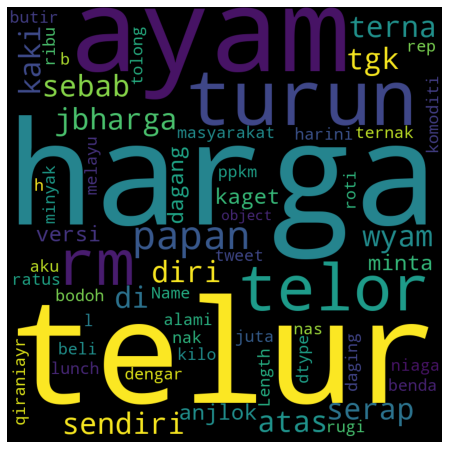

In [17]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()